In [1]:
# Reference: Qiskit Textbook

In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import random_statevector, Statevector, partial_trace

# 2(a)

In [3]:
N = 8
n = 3

ini_ckt = QuantumCircuit(n+1)
INIT_DATA = random_statevector(N).data
ini_ckt.initialize(INIT_DATA, [0, 1, 2])
ini_ckt.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 3)
simulator = Aer.get_backend('statevector_simulator')
job = execute(ini_ckt, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

Statevector([-0.03161768-0.09680218j,  0.10654992-0.31894151j,
              0.00412817-0.17300302j,  0.08186704-0.33820136j,
             -0.01337534-0.03893508j,  0.12806795+0.35824117j,
             -0.19840427+0.05639172j, -0.150033  +0.11847563j,
              0.03161768+0.09680218j, -0.10654992+0.31894151j,
             -0.00412817+0.17300302j, -0.08186704+0.33820136j,
              0.01337534+0.03893508j, -0.12806795-0.35824117j,
              0.19840427-0.05639172j,  0.150033  -0.11847563j],
            dims=(2, 2, 2, 2))


In [4]:
# ini_ckt.draw()

In [5]:
qc = QuantumCircuit(n+1)
qc.initialize(INIT_DATA, [0, 1, 2])
qc.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 3)

qc.barrier()

qc.x(0)
qc.mct(list(range(n)), n)
qc.x(0)

qc.barrier()

qc.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                                                                                             ├»
«     │                                                                                                                                                              │»
«q_1: ┤1 Initialize(-0.044714-0.1369j,0.15068-0.45105j,0.0058381-0.24466j,0.11578-0.47829j,-0.018916-0.055063j,0.18112+0.50663j,-0.28059+0.07975j,-0.21218+0.16755j) ├»
«     │                                                                                                                                                              │»
«q_2: ┤2                                                                                                                                                             ├»
«     └───────────────────────────────────────────────────────────────┬──────────────────────────────┬───────────────────────────────────────────────────────────────┘»
«q_3: ────────────────────────────────────────────────────────────────┤ Initialize(0.70711,-0.70711) ├────────────────────────────────────────────────────────────────»
«                                                                     └──────────────────────────────┘                                                                »
«      ░ ┌───┐     ┌───┐ ░ 
«q_0: ─░─┤ X ├──■──┤ X ├─░─
«      ░ └───┘  │  └───┘ ░ 
«q_1: ─░────────■────────░─
«      ░        │        ░ 
«q_2: ─░────────■────────░─
«      ░      ┌─┴─┐      ░ 
«q_3: ─░──────┤ X ├──────░─
«      ░      └───┘      ░

In [6]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

Statevector([-0.03161768-0.09680218j,  0.10654992-0.31894151j,
              0.00412817-0.17300302j,  0.08186704-0.33820136j,
             -0.01337534-0.03893508j,  0.12806795+0.35824117j,
              0.19840427-0.05639172j, -0.150033  +0.11847563j,
              0.03161768+0.09680218j, -0.10654992+0.31894151j,
             -0.00412817+0.17300302j, -0.08186704+0.33820136j,
              0.01337534+0.03893508j, -0.12806795-0.35824117j,
             -0.19840427+0.05639172j,  0.150033  -0.11847563j],
            dims=(2, 2, 2, 2))


# 2(b)

In [7]:
n=3

iam_qc = QuantumCircuit(n)
    
for qubit in range(n):
    iam_qc.x(qubit)
iam_qc.h(n-1)
iam_qc.mct(list(range(n-1)), n-1)
iam_qc.h(n-1)
for qubit in range(n):
    iam_qc.x(qubit)

iam_qc.draw()

┌───┐          ┌───┐     
q_0: ┤ X ├───────■──┤ X ├─────
     ├───┤       │  ├───┤     
q_1: ┤ X ├───────■──┤ X ├─────
     ├───┤┌───┐┌─┴─┐├───┤┌───┐
q_2: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘

In [8]:
def iam(n):
    
    iam_qc = QuantumCircuit(n)
    
    for qubit in range(n):
        iam_qc.x(qubit)
    iam_qc.h(n-1)
    iam_qc.mct(list(range(n-1)), n-1)
    iam_qc.h(n-1)
    for qubit in range(n):
        iam_qc.x(qubit)
        
    iam_gate = iam_qc.to_gate()
    iam_gate.name = "iam" # To show when we display the circuit
    return iam_gate

# 2(c)

In [9]:
grov_qc = QuantumCircuit(n+1, n)
grov_qc.x(n)
for qubit in range(n+1):
    grov_qc.h(qubit)
    
for i in range(13):
    grov_qc.barrier()

    grov_qc.x(0)
    grov_qc.mct(list(range(n)), n)
    grov_qc.x(0)

    grov_qc.barrier()
    
    for qubit in range(n):
        grov_qc.h(qubit)
    grov_qc.append(iam(n), range(n))
    for qubit in range(n):
        grov_qc.h(qubit)

grov_qc.barrier()        

grov_qc.measure(0, 0)
grov_qc.measure(1, 1)
grov_qc.measure(2, 2)

# grov_qc.draw()

{'000': 123, '101': 150, '001': 122, '010': 128, '111': 146, '100': 117, '011': 117, '110': 121}


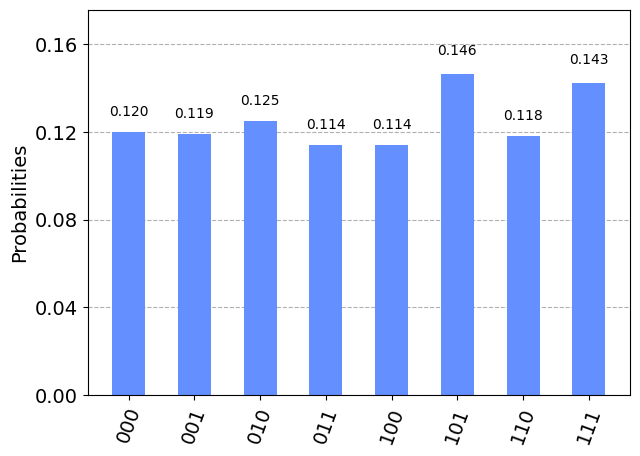

In [10]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(grov_qc, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# 2(d) 2(e) 2(f)

In [11]:
N = 8
n = 3

ini_ckt = QuantumCircuit(n)
INIT_DATA = random_statevector(N).data
ini_ckt.initialize(INIT_DATA, [0, 1, 2])

simulator = Aer.get_backend('statevector_simulator')
job = execute(ini_ckt, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

Statevector([ 0.09887869+0.09685313j, -0.3805797 -0.15407801j,
              0.13118812-0.00619278j, -0.36079951-0.37330189j,
             -0.01422268-0.12254061j, -0.05473997+0.46574395j,
              0.21355296+0.40905966j,  0.07004607-0.26927453j],
            dims=(2, 2, 2))


In [12]:
_grov = QuantumCircuit(n)
_grov.initialize(INIT_DATA, [0, 1, 2])
_grov.cz(0, 2)
_grov.cz(1, 2)

simulator = Aer.get_backend('statevector_simulator')
job = execute(_grov, simulator)
result = job.result()
statevector = result.get_statevector()

print(statevector)

Statevector([ 0.09887869+0.09685313j, -0.3805797 -0.15407801j,
              0.13118812-0.00619278j, -0.36079951-0.37330189j,
             -0.01422268-0.12254061j,  0.05473997-0.46574395j,
             -0.21355296-0.40905966j,  0.07004607-0.26927453j],
            dims=(2, 2, 2))


In [13]:
_grov = QuantumCircuit(n+1, n)
_grov.x(n)
for qubit in range(n+1):
    _grov.h(qubit)

for i in range(1):
    _grov.barrier()
    
    _grov.cz(0, 2)
    _grov.cz(1, 2)
    
    _grov.cz(1, 0)
    
    _grov.barrier()
    
    for qubit in range(n):
        _grov.h(qubit)
    _grov.append(iam(n), range(n))
    for qubit in range(n):
        _grov.h(qubit)
        
_grov.barrier()

_grov.measure(0, 0)
_grov.measure(1, 1)
_grov.measure(2, 2)

_grov.draw()

┌───┐      ░           ░ ┌───┐┌──────┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├──────░──■─────■──░─┤ H ├┤0     ├┤ H ├─░─┤M├──────
     ├───┤      ░  │     │  ░ ├───┤│      │├───┤ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░──┼──■──■──░─┤ H ├┤1 iam ├┤ H ├─░──╫─┤M├───
     ├───┤      ░  │  │     ░ ├───┤│      │├───┤ ░  ║ └╥┘┌─┐
q_2: ┤ H ├──────░──■──■─────░─┤ H ├┤2     ├┤ H ├─░──╫──╫─┤M├
     ├───┤┌───┐ ░           ░ └───┘└──────┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░───────────░────────────────────░──╫──╫──╫─
     └───┘└───┘ ░           ░                    ░  ║  ║  ║ 
c: 3/═══════════════════════════════════════════════╩══╩══╩═
                                                    0  1  2

{'011': 140, '100': 131, '101': 137, '010': 113, '111': 124, '110': 132, '000': 103, '001': 144}


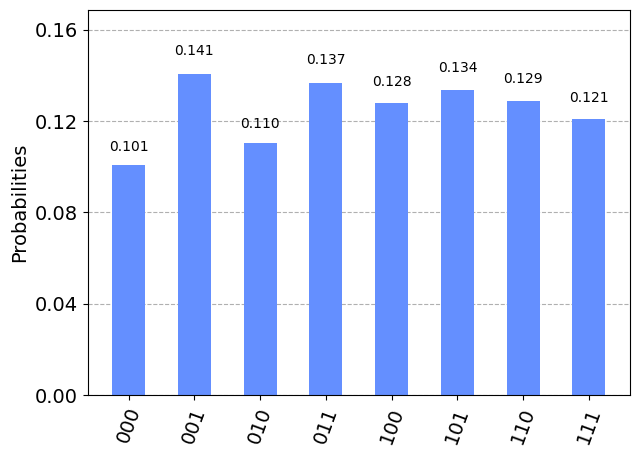

In [14]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(_grov, simulator, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [15]:
# apitoken = "8f84cb4cd160cd4c1ca646b369894917e3cb1cd76a7dfcb48cf76d5cd9a44e3a08c86c0e3a456c6a7b3d24de29d8e5d10972fd0dd9272631451066746885e1b4"
# IBMQ.save_account(apitoken)

# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
# qcomp = provider.get_backend('ibmq_manila')
# job = execute(_grov, backend=qcomp, shots=1024, memory=True) # memory=True

In [16]:
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)

# result = job.result()
# counts = result.get_counts()

# print(counts)
# plot_histogram(counts)